# Toxic Comment Classification Challenge
# Exploratory Data Analysis

## Introduction

In this section, we will perform a brief exploratory data analysis to gain an understanding of the Kaggle Jigsaw Toxic Comment Classification Challenge dataset. This dataset contains user comments from Wikipedia, labeled for various types of toxicity, including toxic, severe toxic, obscene, threat, insult, and identity hate. Our goal is to examine the structure and distribution of the data, identify the presence and balance of each toxic category, and prepare the data for the subsequent stages of preprocessing and model building. This initial exploration will provide valuable insights that will guide our approach to developing an effective multi-label classifier.

## Data Overview

### Loading Data

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np



from utils import plot_class_distribution, plot_class_distribution_per_comment, plot_comment_lengths_with_stats
from utils import preprocess_text, clean_text_for_bert

import matplotlib.pyplot as plt

from tabulate import tabulate

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MiestoMeska\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MiestoMeska\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
train = pd.read_csv('../data/original/train.csv')
test = pd.read_csv('../data/original/test.csv')


In [3]:
train.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
128526,af610053f52090e6,"""\n\n Please do not vandalize pages, as you di...",0,0,0,0,0,0
140303,eeb86124066de8ec,ANGRY BIRDS YAYYYYYYYYYYYY \n\nOK IM DONEEEEEE...,0,0,0,0,0,0
158043,e7cda9928f074cfb,"Welcome!\n\nHello, , and welcome to Wikipedia!...",0,0,0,0,0,0
98522,0f049dcf61ee756b,"""\n ::: This is not my problem....this is just...",1,0,1,0,1,0
47370,7e89e526b24316f2,"""\nI confirmed that a magazine with this name ...",0,0,0,0,0,0


In [4]:
test.sample(5)

,id,comment_text
29380,30e0f7a9c6eb92a3,:I put it back but just until I decide how to ...
137550,e5f0ed386c20534f,== POV: ==
79522,84b98318385ed3a0,""" \n\n ==Tulsa Movie Poster== \n\n The captio..."
115027,bffc77343ab6772f,"Hi Ron, thanks for your response. My talk page..."
53602,590fb8471ee98990,OK. The deed is done. And I do NOT look like ...


## Preprocessing the Data

Data preprocessing is a crucial step in any machine learning or natural language processing (NLP) workflow. It involves transforming raw data into a clean, organized format that is suitable for building and training models.

In [5]:
sample_text = "Hello, don't worry about www.example.com, it's alright!"
cleaned_text = clean_text_for_bert(sample_text)
print("Original Text:", sample_text)
print("Cleaned Text:", cleaned_text)

Original Text: Hello, don't worry about www.example.com, it's alright!
Cleaned Text: hello do not worry about it is alright


In [6]:
#train['cleaned_text'] = train['comment_text'].apply(clean_text_for_bert)
#train.to_csv('../data/cleaned/train_cleaned_comments.csv', index=False)

In [7]:
cleaned_data = pd.read_csv('../data/cleaned/train_cleaned_comments.csv')
sampled_data = cleaned_data[['comment_text', 'cleaned_text']].sample(5, random_state=11)

for index, row in sampled_data.iterrows():
    print(f"Original Text:\n\n{row['comment_text']}\n")
    print(f"Cleaned Text:\n\n{row['cleaned_text']}\n")
    print(f"---------------------------------------\n")

Original Text:

"
 Oppose. WP:MOSTM, the guideline covering trademarks and brands, explicitly states not to do this. We don't need articles with titles like REALTOR, TIME, Se7en, Alien³, etc., despite those being their ""official"" names: these are brandings, and are designed to promote their products. But Wikipedia is not supposed to be promotional. NBC, CBS, and ABC are actual abbreviations, and are pronounced en-bee-cee, cee-bee-ess, ay-bee-cee. A reader who is truly unfamiliar with Fox in this context will end up pronouncing it ""eff-oh-ecks"".  "

Cleaned Text:

oppose wpmostm the guideline covering trademark and brand explicitly state not to do this we do not need article with title like realtor time seen alien etc despite those being their official name these are branding and are designed to promote their product but wikipedia is not supposed to be promotional nbc cbs and abc are actual abbreviation and are pronounced enbeecee ceebeeess aybeecee a reader who is truly unfamiliar 

### Train Data Shape

In [8]:
cleaned_data.shape

(159571, 9)

In [9]:
cleaned_data.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,cleaned_text
23395,3dca2509e119dc58,"""\n\n Please stop. If you continue to vandaliz...",0,0,0,0,0,0,please stop if you continue to vandalize wikip...
48271,8107d0ca3b8bb210,"Hi, thanks for the ballot. I am looking the re...",0,0,0,0,0,0,hi thanks for the ballot i am looking the resu...
149987,64ecf515e5ccc966,otherwise the matter will never be laid to res...,0,0,0,0,0,0,otherwise the matter will never be laid to res...
151153,781ff77df3b84568,"Meh, I keep getting banned here, it's easier t...",0,0,0,0,0,0,meh i keep getting banned here it is easier th...
99049,11e86e0a9af4c845,"""\n\n Super Mario RPG lists \n\nYou asked why ...",0,0,0,0,0,0,super mario rpg list you asked why list of loc...


## Missing Values

In [10]:
missing_values_clean = cleaned_data.isnull().sum()
print('Missing values in cleaned train dataset for each column:')
print(missing_values_clean)

Missing values in cleaned train dataset for each column:
id                 0
comment_text       0
toxic              0
severe_toxic       0
obscene            0
threat             0
insult             0
identity_hate      0
cleaned_text     278
dtype: int64


In [11]:
missing_cleaned_text = cleaned_data[cleaned_data['cleaned_text'].isnull()]
print(missing_cleaned_text['comment_text'])

177       86.29.244.57|86.29.244.57]] 04:21, 14 May 2007
281                   2005 (UTC)\n\n  15:59, 17 December
829                             06:15, 19 Aug 2004 (UTC)
1049                               10:36, 5 January 2012
1217                         05 /\n8: – 08:17, 12 August
                               ...                      
155484                         00:35, Dec 26, 2004 (UTC)
158407                           21:52, 6 Apr 2005 (UTC)
158438                            09:37, 1 February 2009
158677                   06:41, September 11, 2005 (UTC)
159549                        2005 (UTC)\n 06:35, 31 Mar
Name: comment_text, Length: 278, dtype: object


The 24 comments listed contain mostly URLs, IP addresses, timestamps, or references to external links, which after the cleaning process result in no meaningful text for the model to process. Since these comments no longer hold any valuable content for training a machine learning model, they will be dropped from the dataset. This ensures that only meaningful data is passed to the model, improving the quality of the training process.

In [12]:
cleaned_data = cleaned_data.dropna(subset=['cleaned_text'])

## Duplicates

In [13]:
duplicate_comments = cleaned_data[cleaned_data.duplicated('cleaned_text', keep=False)]

if not duplicate_comments.empty:
    print("Duplicate entries found:")
    print(duplicate_comments)
else:
    print("No duplicate entries found.")

Duplicate entries found:
                      id                                       comment_text  \
23      000c6a3f0cd3ba8e  "\n\n The Signpost: 24 September 2012 \n\n Rea...   
165     0066dcf7d9ecd360  "\n\n 123 18:38, July 18, 2005 (UTC)\n\nP.S. F...   
235     00958dec64c33224  Please stop adding nonsense to Wikipedia. It i...   
351     00e0d3f34d4c0ce4            Future Perfect at Sunrise|☼]] 14:59, 16   
522     015fb4312e66b0b0  "\n\nApparently, other editors agree that the ...   
...                  ...                                                ...   
159210  fa532a40c93b329c  "\n\nPlease do not add nonsense to Wikipedia. ...   
159217  fa6fb69f4de2c489  Thank you for experimenting with the page Dece...   
159467  fe453300f9a5de50                                  (talk • contribs)   
159548  ffb93b0a0a1e78f9                        Talkback: 15 September 2012   
159558  ffca1e81aefc48ac  Please stop removing content from Wikipedia; i...   

        toxic  severe_toxi

In [14]:
duplicate_groups = cleaned_data.groupby('cleaned_text').size().reset_index(name='count')

duplicates_only = duplicate_groups[duplicate_groups['count'] > 1]

print("Duplicate cleaned_text entries and their counts:")
print(duplicates_only)

duplicate_rows = cleaned_data[cleaned_data['cleaned_text'].isin(duplicates_only['cleaned_text'])]
print(duplicate_rows[['cleaned_text', 'id']])

clean_dedup_data = cleaned_data.drop_duplicates(subset='cleaned_text', keep='first')
print(f"Number of rows after dropping duplicates: {len(clean_dedup_data)}")

Duplicate cleaned_text entries and their counts:
                                             cleaned_text  count
188     a barnstar for you the modest barnstar in reco...      2
192              a barnstar for you the original barnstar      3
281     a barnstar for you you are just amazing at sta...      2
504     a demonpossessed pedophile pedophile alone wa ...      2
722     a friendly message to angela if you have not c...      2
...                                                   ...    ...
157288  your request to be unblocked ha been granted f...      4
157290  your request to be unblocked ha been granted f...      3
157365  your serious mental illness and addiction this...      2
157399  your stalker friend is back the hostile user y...      2
157948  zionist jew please stop spreadin your lie bias...      2

[781 rows x 2 columns]
                                             cleaned_text                id
23      the signpost read this signpost in full single...  000c6a3f0cd3

## Data Distribution

### Clean and Toxic Comments Distribution

In [15]:
clean_dedup_data = clean_dedup_data.copy()
clean_dedup_data.loc[:, 'is_toxic'] = clean_dedup_data[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) > 0

toxic_count = clean_dedup_data['is_toxic'].sum()
non_toxic_count = len(clean_dedup_data) - toxic_count

train_class_sum = pd.Series([toxic_count, non_toxic_count], index=['Toxic', 'Non-Toxic'])

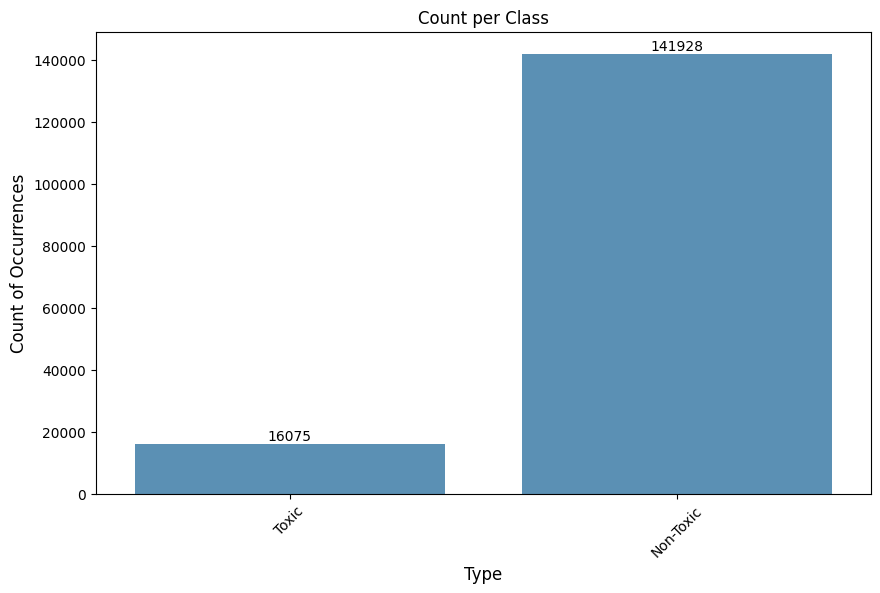

In [16]:
plot_class_distribution(train_class_sum)

The dataset consists of 16075 toxic comments and 141928 non-toxic comments. This indicates a significant class imbalance, with non-toxic comments vastly outnumbering toxic comments.

### Toxicity Class Distribution

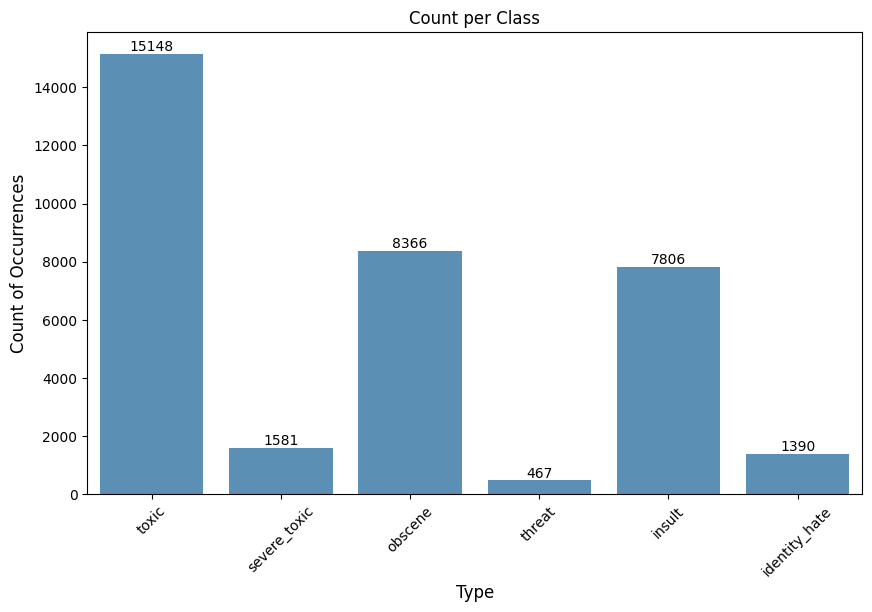

In [17]:
toxicity_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_class_dist = clean_dedup_data[toxicity_columns].sum()

plot_class_distribution(train_class_dist)

This distribution highlights a significant imbalance among the different categories of toxicity. The "Threat" and "Identity Hate" categories, in particular, have very few instances compared to others like "Toxic" and "Obscene." This imbalance can affect the model's ability to accurately predict less frequent categories.

### Distribution of Classes per Comment

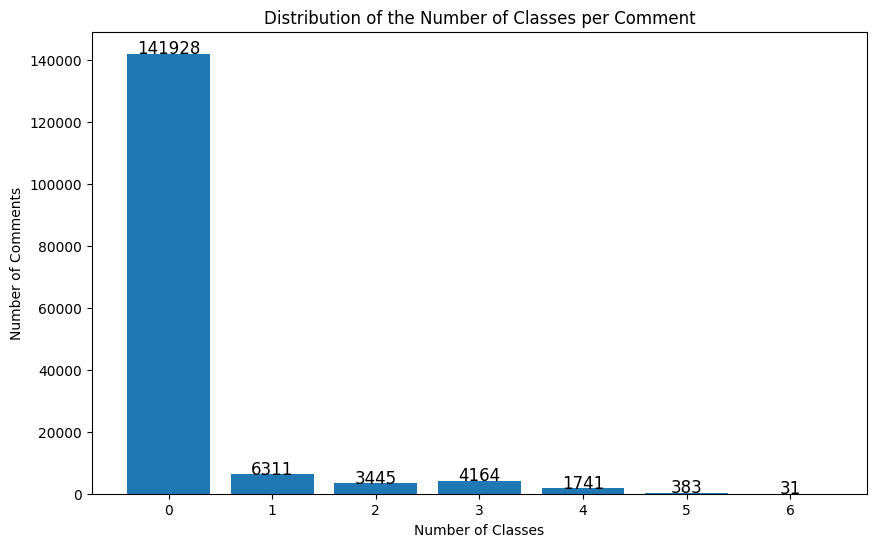

In [18]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
plot_class_distribution_per_comment(clean_dedup_data, labels)

This distribution suggests a significant imbalance, with most comments being non-toxic and very few comments exhibiting multiple forms of toxicity.

## Length of comments

C:\Users\MiestoMeska\anaconda3\envs\TC_4\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (539 > 512). Running this sequence through the model will result in indexing errors


Describe Table of Tokenized Comment Lengths:
count    158003.000000
mean         76.580255
std         112.854071
min           3.000000
25%          20.500000
50%          41.000000
75%          85.000000
max        2502.000000
Name: comment_length, dtype: float64


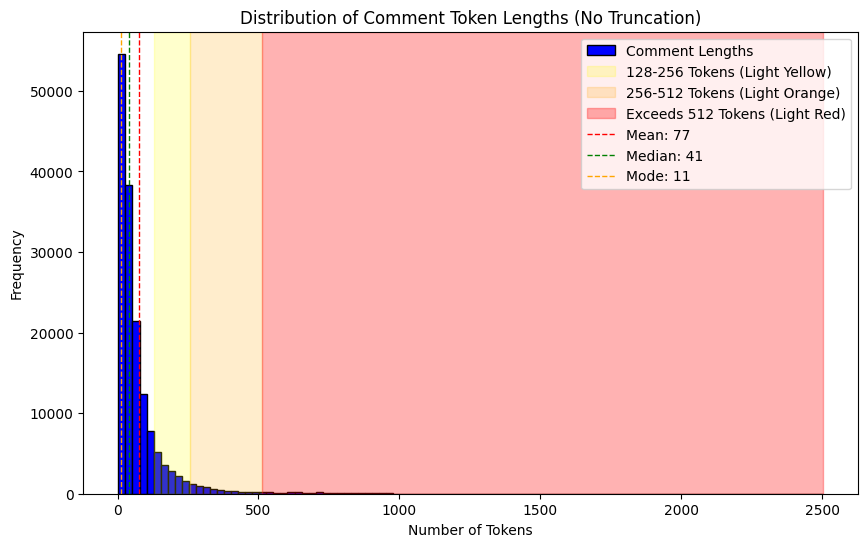

In [19]:
title = "Distribution of Comment Token Lengths (No Truncation)"
plot_comment_lengths_with_stats(clean_dedup_data, title)

In [20]:
df = clean_dedup_data.copy()
toxicity_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

df.loc[:, 'is_toxic'] = df[toxicity_columns].max(axis=1).astype(bool)

toxic_df = df[df['is_toxic'] == 1]
non_toxic_df = df[df['is_toxic'] == 0]

C:\Users\MiestoMeska\anaconda3\envs\TC_4\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (782 > 512). Running this sequence through the model will result in indexing errors


Describe Table of Tokenized Comment Lengths:
count    16075.000000
mean        64.798445
std        140.481472
min          4.000000
25%         15.000000
50%         29.000000
75%         59.000000
max       2275.000000
Name: comment_length, dtype: float64


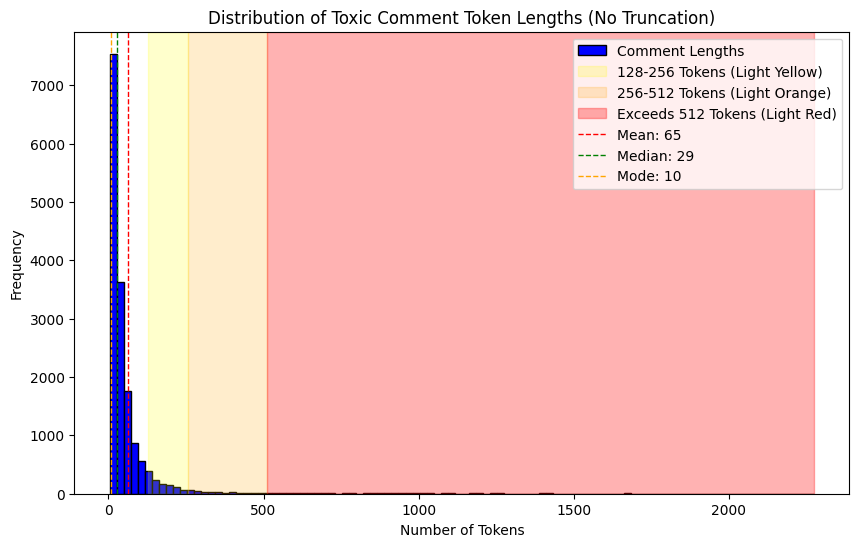

In [21]:
title = "Distribution of Toxic Comment Token Lengths (No Truncation)"
plot_comment_lengths_with_stats(toxic_df, title)

C:\Users\MiestoMeska\anaconda3\envs\TC_4\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (539 > 512). Running this sequence through the model will result in indexing errors


Describe Table of Tokenized Comment Lengths:
count    141928.000000
mean         77.914682
std         109.206014
min           3.000000
25%          21.000000
50%          43.000000
75%          87.000000
max        2502.000000
Name: comment_length, dtype: float64


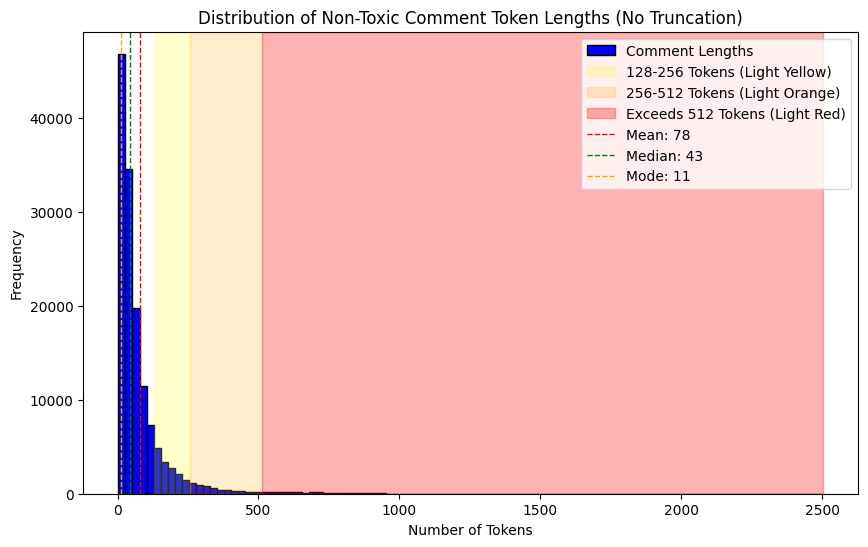

In [22]:
title = "Distribution of Non-Toxic Comment Token Lengths (No Truncation)"
plot_comment_lengths_with_stats(non_toxic_df, title)

Both toxic and non-toxic comments are predominantly short, with a few very long comments stretching the distribution.

Non-Toxic Comments are generally longer, with higher mean, median, and mode values compared to toxic comments.
This suggests that non-toxic discussions are often more detailed, while toxic comments tend to be brief.

Handling Outliers: There is a small number of very long comments (greater than 512 tokens). These could be considered outliers, and truncating them at 512 tokens (or even earlier) would likely not impact model performance significantly.

Token Length: Based on the distribution, setting the maximum token length to 128 tokens is a good starting point for training. This will cover most of the data efficiently while allowing for faster training times.


## Conclusions

### Data Overview

* The dataset is evenly split between training (51%) and testing (49%) with 159,571 comments in the training set and 153,164 in the test set.
* No missing values are present in the dataset

### Class Distribution

* The dataset is heavily imbalanced, with non-toxic comments vastly outnumbering toxic ones.
* Among the toxic categories, classes like "Threat" and "Identity Hate" are particularly underrepresented, which could pose challenges in model training, leading to poor performance on these classes.

### Comment Length Analysis

* Non-toxic comments are generally longer, with higher mean, median, and mode values compared to toxic comments. This suggests that non-toxic discussions are more detailed, while toxic comments tend to be shorter and more direct.